# Challenge Overview

This new assignment for you and Omar consists of three parts: two additional technical analyses and a written report that delivers your results to the CEO. To summarize, you will submit the following deliverables:

- Technical Analysis Deliverable 1: A DataFrame that summarizes the key metrics for the ride-sharing data by city type.
- Technical Analysis Deliverable 2: A multiple-line chart, with one line for each city type, that shows the sum of the fares for each week.
- Delivering Results: A written report of your results, saved in a README.md document on your GitHub repository.

## Technical Analysis Deliverable 1: A Summary DataFrame

In [223]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)

In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [419]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df,how="left",on=["city", "city"])
pyber_data_df

pyber_data = pyber_data_df.set_index(["type"])
df=pd.DataFrame(pyber_data)
df

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [289]:
# Create the DataFrame for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


### Get the number of rides for each city type.

In [290]:
# Get the number of rides for each city type.
urban_ride_count = sum(urban_cities_df.groupby(["city"]).count()["ride_id"])
suburban_ride_count = sum(suburban_cities_df.groupby(["city"]).count()["ride_id"])
rural_ride_count = sum(rural_cities_df.groupby(["city"]).count()["ride_id"])

### Get the total fare for each city type

In [291]:
# Get total fare for each city type.
urban_total_fare = sum(urban_cities_df.groupby(["city"]).sum()["fare"])
suburban_total_fare = sum(suburban_cities_df.groupby(["city"]).sum()["fare"])
rural_total_fare = sum(rural_cities_df.groupby(["city"]).sum()["fare"])

### Get the total number of drivers for each city type

In [292]:
# Get the total number of drivers for each city type.
urban_driver_count = sum(urban_cities_df.groupby(["city"]).mean()["driver_count"])
suburban_driver_count = sum(suburban_cities_df.groupby(["city"]).mean()["driver_count"])
rural_driver_count = sum(rural_cities_df.groupby(["city"]).mean()["driver_count"])

### Get the average fare per ride

In [293]:
# Get average fare per ride for each city type.
urban_ride_fare = urban_total_fare/urban_ride_count
suburban_ride_fare = suburban_total_fare/suburban_ride_count
rural_ride_fare = rural_total_fare/rural_ride_count

### Get the average fare per driver

In [294]:
# Get average fare per driver for each city type.
urban_driver_fare = urban_total_fare/urban_driver_count
suburban_driver_fare = suburban_total_fare/suburban_driver_count
rural_driver_fare = rural_total_fare/rural_driver_count

### Create Summary DataFrame

In [330]:
# information on identifying index values - https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
summary_df = pd.DataFrame({
    "Total Rides": [rural_ride_count,suburban_ride_count,urban_ride_count],
    "Total Drivers": [rural_driver_count,suburban_driver_count,urban_driver_count],
    "Total Fares":[rural_total_fare,suburban_total_fare,urban_total_fare],
    "Average Fare per Ride": [rural_ride_fare, suburban_ride_fare, urban_ride_fare],
    "Average Fare per Driver": [rural_driver_fare, suburban_driver_fare, urban_driver_fare]},
    index=["Rural","Suburban","Urban"])
summary_df   

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [332]:
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)

In [333]:
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)

In [334]:
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [335]:
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)

### Deliverable 1: A Summary DataFrame

In [336]:
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,"$4,327.93",$34.62,$55.49
Suburban,625,490.0,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405.0","$39,854.38",$24.53,$16.57


## Technical Analysis Deliverable 2: Multiple-Line Plot for the Sum of the Fares for Each City Type

### 1. Rename the columns

In [342]:
# Rename columns
clean_pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
clean_pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


### 2. Set index to the Date column

In [417]:
# set index to Date column 
new_pyber_data = clean_pyber_data_df.set_index(["Date"])
new_pyber_data

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


### 3. Create new DataFrame with only City Type and Fare columns
### 4. Set index to the datetime data type

In [356]:
new_pyber_data_df = new_pyber_data[['City Type', 'Fare']].copy()
new_pyber_data_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [357]:
new_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


### 5. Calculate sum of fares by the type of city and date

In [371]:
total_fare_2 = new_pyber_data_df.groupby(["City Type","Date"]).sum()["Fare"]
total_fare_2

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

### 6. Convert groupby() series to DataFrame

In [369]:
total_fare_2_df = pd.DataFrame(total_fare_2)

In [370]:
total_fare_2_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

### 7. Reset index and create pivot table

In [421]:
reset_total_fare = total_fare_2_df.reset_index()

In [422]:
reset_total_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Date       2375 non-null   object 
 2   Fare       2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.8+ KB


In [438]:
reset_total_fare["Date"]=pd.to_datetime(reset_total_fare["Date"])

In [440]:
reset_total_fare_df = pd.pivot_table(data = total_fare_2_df, index=["Date"], columns = "City Type", values = "Fare")

reset_total_fare_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


### 8. Create new DataFrame from pivot table

In [436]:
# New pivot table using .loc for dates

new_pivot_df = reset_total_fare_df.loc['2019-01-01':'2019-04-28']

In [437]:
new_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [435]:
new_pivot_df.index

Index(['2019-01-01 00:08:16', '2019-01-01 00:46:46', '2019-01-01 02:07:24',
       '2019-01-01 03:46:50', '2019-01-01 05:23:21', '2019-01-01 09:45:36',
       '2019-01-01 12:32:48', '2019-01-01 14:40:14', '2019-01-01 14:42:25',
       '2019-01-01 14:52:06',
       ...
       '2019-04-27 14:11:38', '2019-04-27 14:37:32', '2019-04-27 14:57:38',
       '2019-04-27 16:20:00', '2019-04-27 16:22:23', '2019-04-27 17:58:27',
       '2019-04-27 19:45:48', '2019-04-27 20:41:36', '2019-04-27 23:26:03',
       '2019-04-27 23:52:44'],
      dtype='object', name='Date', length=2177)

### 9. Create a new DataFrame by setting the DataFrame you created in Step 8 with resample() in weekly bins, and calculate the sum() of the fares for each week in the resampled data.

In [442]:
# Convert "Date" index to Datetime data type
new_pivot_df.index = pd.to_datetime(new_pivot_df.index)

In [443]:
new_pivot_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-27 14:11:38', '2019-04-27 14:37:32',
               '2019-04-27 14:57:38', '2019-04-27 16:20:00',
               '2019-04-27 16:22:23', '2019-04-27 17:58:27',
               '2019-04-27 19:45:48', '2019-04-27 20:41:36',
               '2019-04-27 23:26:03', '2019-04-27 23:52:44'],
              dtype='datetime64[ns]', name='Date', length=2177, freq=None)

In [448]:
final_df = new_pivot_df.resample("W").sum()
final_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


### 10. Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function.

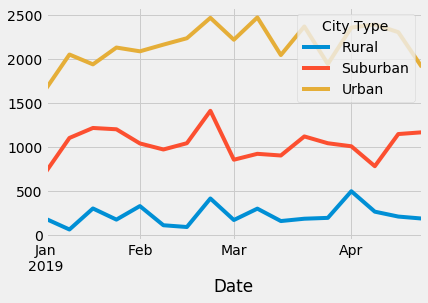

In [459]:
final_df.plot()

ax.set_title("Total Fare By City Type")

plt.show()